In [11]:
!pip install yfinance

In [ ]:
# 1. Read in stock price data from an API.

In [1]:
import pandas as pd
import yfinance as yf
import datetime as dt
from sklearn import preprocessing

In [72]:
data = yf.download("AAPL", start="2014-01-01", end=dt.date.today())

[*********************100%***********************]  1 of 1 completed


In [73]:
data.to_csv('AppleInc_Dataset.csv')

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.388985,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,17.007013,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.099758,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.977467,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.084982,258529600


In [4]:
data.shape

(2356, 6)

In [5]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  2356.000000  2356.000000  2356.000000  2356.000000  2356.000000   
mean     70.710507    71.516605    69.949991    70.769473    69.000379   
std      50.612146    51.276431    49.991871    50.667190    51.221964   
min      17.684999    17.911785    17.626785    17.849285    15.711793   
25%      29.201875    29.438750    29.006250    29.191875    26.908900   
50%      45.809999    46.158751    45.257500    45.733749    44.031439   
75%     124.122499   125.432499   122.377497   124.384998   122.769665   
max     182.630005   182.940002   179.119995   182.009995   180.683868   

             Volume  
count  2.356000e+03  
mean   1.421239e+08  
std    8.399005e+07  
min    3.519590e+07  
25%    8.633350e+07  
50%    1.170898e+08  
75%    1.733615e+08  
max    1.065523e+09  


In [7]:
# 2. Visualize data in table and in graph(s).

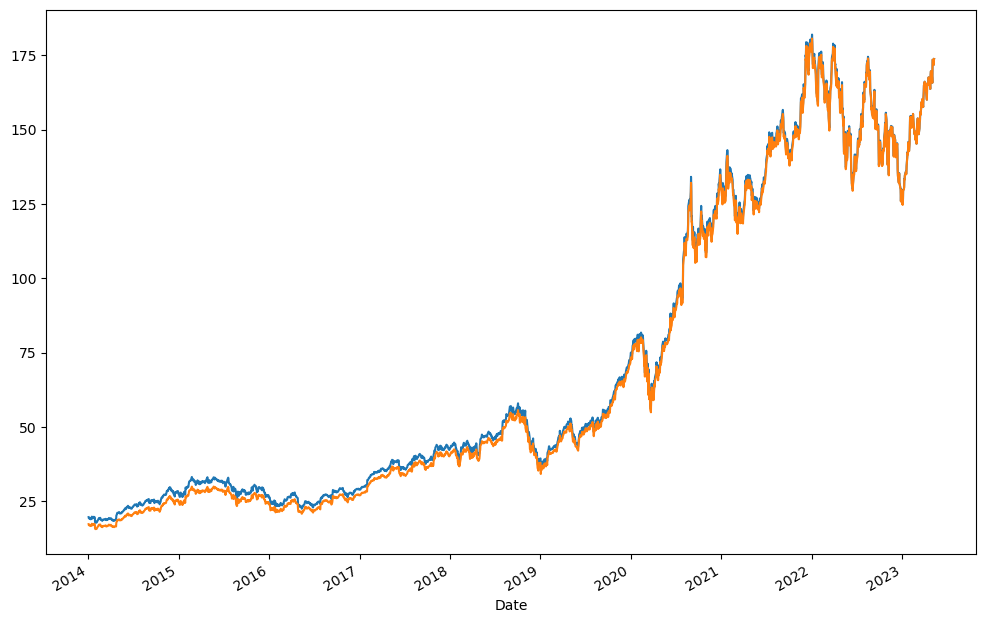

In [8]:
import matplotlib
import matplotlib.pyplot as plt
# Select a column using 
data["Close"].plot() 
# automatically creates a plot of the data
data["Adj Close"].plot(figsize=(12,8)) 
plt.show()


In [9]:
import statsmodels.api as sm

# # Perform time series decomposition to extract the components
decomp = sm.tsa.seasonal_decompose(data['Close'], model='additive', period=30)

# Extract the base, trend, season, and residual components
base = decomp.trend + decomp.resid
trend = decomp.trend
season = decomp.seasonal
residual = decomp.resid

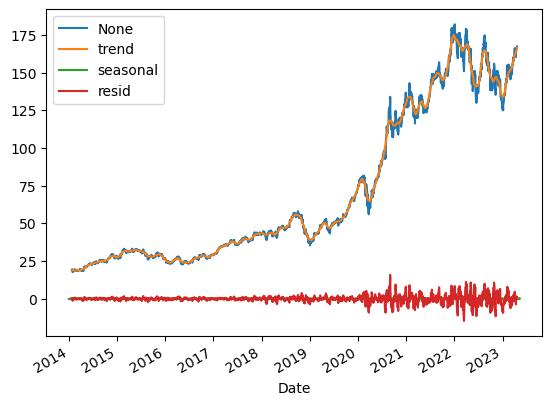

In [10]:
base.plot()
trend.plot()
season.plot()
residual.plot()
plt.legend()
plt.show()

In [11]:
# 3. Plot descriptive statistics to understand the data.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Descriptive analysis
desc = data.describe()

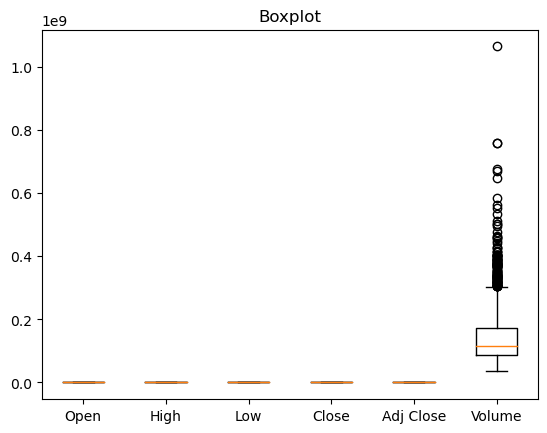

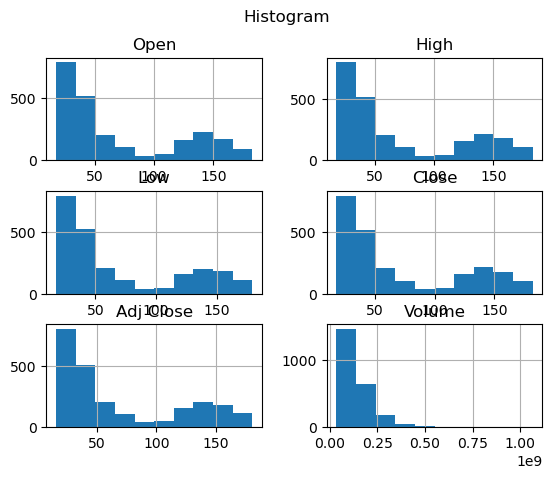

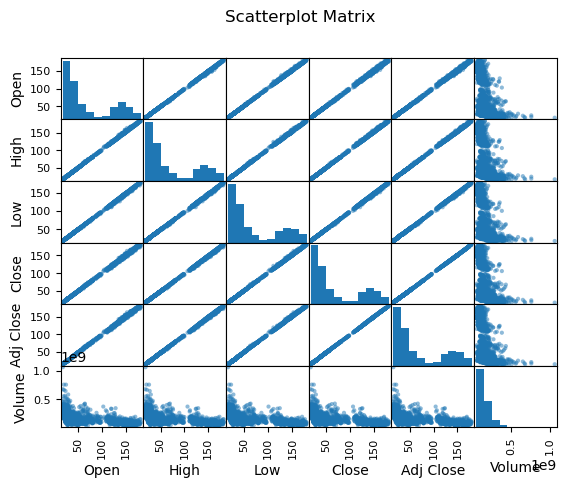

In [13]:
# Plot boxplot
plt.boxplot(data.values)
plt.xticks(range(1, len(data.columns) + 1), data.columns)
plt.title('Boxplot')
plt.show()

# Plot histogram
data.hist()
plt.suptitle('Histogram')
plt.show()

# Plot scatterplot matrix
pd.plotting.scatter_matrix(data)
plt.suptitle('Scatterplot Matrix')
plt.show()

In [14]:
# Print descriptive statistics
print(desc)

              Open         High          Low        Close    Adj Close  \
count  2356.000000  2356.000000  2356.000000  2356.000000  2356.000000   
mean     70.710507    71.516605    69.949991    70.769473    69.000379   
std      50.612146    51.276431    49.991871    50.667190    51.221964   
min      17.684999    17.911785    17.626785    17.849285    15.711793   
25%      29.201875    29.438750    29.006250    29.191875    26.908900   
50%      45.809999    46.158751    45.257500    45.733749    44.031439   
75%     124.122499   125.432499   122.377497   124.384998   122.769665   
max     182.630005   182.940002   179.119995   182.009995   180.683868   

             Volume  
count  2.356000e+03  
mean   1.421239e+08  
std    8.399005e+07  
min    3.519590e+07  
25%    8.633350e+07  
50%    1.170898e+08  
75%    1.733615e+08  
max    1.065523e+09  


In [15]:
# 4. Calculate a feature of the raw data, e.g., Moving Average MA(5) on close price

In [16]:
ma = data['Close'].rolling(window=5).mean()

In [17]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.388985,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,17.007013,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.099758,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.977467,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.084982,258529600


In [18]:
# 5. Plot both raw close and MA(5) in the same 
# graph, what can we see? Drop other columns

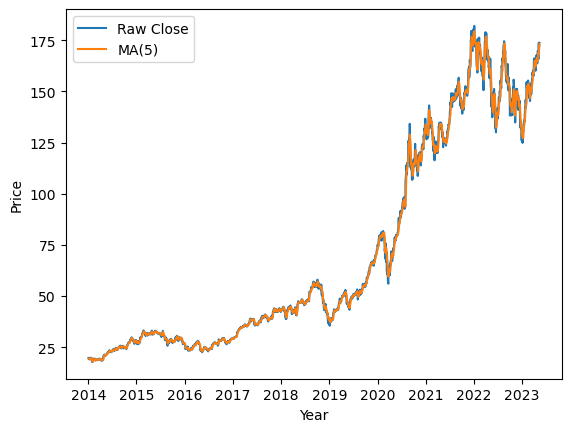

In [19]:
plt.plot(data['Close'], label='Raw Close')
plt.plot(ma, label='MA(5)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

In [20]:
# Preparing features for a regression

In [21]:
# Given that we provide the label during training we hope to achive a close approximation
# MA3 in this case will hopefully help the model to filter out noise

In [22]:
# 6. Add, a label column, shift data

In [23]:
data['Label'] = data.Close.shift(-1)
data['MA3'] = data['Close'].rolling(window=3).mean()

In [24]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Label,MA3
Date,,,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.388985,234684800,19.320715,NaN
2014-01-03,19.745001,19.775000,19.301071,19.320715,17.007013,392467600,19.426071,NaN
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.099758,412610800,19.287144,19.500476
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.977467,317209200,19.409286,19.344643
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.084982,258529600,19.161428,19.374167


In [25]:
# Dropping un-necessory columns and dropping null rows

data = data.drop(['Open', 'High', 'Adj Close', 'Volume', 'Low'], axis=1)
data = data.dropna()
data.head()

,Close,Label,MA3
Date,,,
2014-01-06,19.426071,19.287144,19.500476
2014-01-07,19.287144,19.409286,19.344643
2014-01-08,19.409286,19.161428,19.374167
2014-01-09,19.161428,19.033571,19.285953
2014-01-10,19.033571,19.133215,19.201429


In [22]:
# Below techniques were used just to get the best technique for forecasting 

In [290]:
# Data Preprocessing Techniques for Time Series Regression Forecasting

In [93]:
import numpy as np
from scipy.stats import boxcox, yeojohnson
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose

In [94]:
# Normalize the scale
# 1.MinMaxScaler approach

MM_scaler = MinMaxScaler()
data['MinMaxScaled'] = MM_scaler.fit_transform(data[['Close']])

In [95]:
# 2.StandardScaler approach

S_scaler = StandardScaler()
data['StandardScaled'] = S_scaler.fit_transform(data[['Close']])

In [97]:
# Reduce the impact of outliers
# 3.Log Transformation

data['log_transformed'] = np.log(data['Close'])

In [98]:
# Stabilize variance
# 4.Box-Cox Transformation

data['BoxCoxTransformed'], _ = boxcox(data['Close'])

In [99]:
# 5.yeojohnson Transformation

data['YeoJohnsonTransformed'], _ = yeojohnson(data['Close'])

In [100]:
# Noisy data
# 6.Rolling Mean(MA)

data['RollingMean'] = data['Close'].rolling(window=5).mean()

In [102]:
#7.Exponential Smoothing

alpha = 0.1
data['ExpoSmoothing'] = data['Close'].ewm(alpha=alpha).mean()

In [104]:
# Stationarity
# 8.Detrending

linear_trend = np.polyfit(range(len(data)), data['Close'], 1)
data['Detrending'] = data['Close'] - (linear_trend[0] * np.arange(len(data)) + linear_trend[1])

In [105]:
# 9.Differencing

data['Differenced'] = data['Close'].diff()

In [107]:
# 10.Seasonal Decompose

decomposition = seasonal_decompose(data['Close'], model='additive', period=30)
data['SeasonalDecomposition'] = decomposition.resid

In [26]:
# Dropping null values in dataframe

data.dropna(inplace=True)

In [27]:
print(data.head())

                Close      Label        MA3
Date                                       
2014-01-06  19.426071  19.287144  19.500476
2014-01-07  19.287144  19.409286  19.344643
2014-01-08  19.409286  19.161428  19.374167
2014-01-09  19.161428  19.033571  19.285953
2014-01-10  19.033571  19.133215  19.201429


In [25]:
# standerdizing data for column

data_normalize = pd.DataFrame()
data_normalize['Close'] = (data['Close'] - data['Close'].mean())/data['Close'].std()

In [26]:
data_normalize.head()

,Close
Date,
2014-01-06,-1.013837
2014-01-07,-1.016583
2014-01-08,-1.014169
2014-01-09,-1.019068
2014-01-10,-1.021594


In [52]:
# We will use only standardize, MA and Label techniques, which is already taken above

In [53]:
data.head()

,Close,Label,MA3
Date,,,
2014-01-06,-1.013633,-1.017020,-1.011787
2014-01-07,-1.016380,-1.014607,-1.014871
2014-01-08,-1.013965,-1.019505,-1.014287
2014-01-09,-1.018866,-1.022032,-1.016033
2014-01-10,-1.021395,-1.020063,-1.017706


In [28]:
data = (data - data.mean())/data.std()

In [29]:
data.head()

,Close,Label,MA3
Date,,,
2014-01-06,-1.014027,-1.017395,-1.012176
2014-01-07,-1.016771,-1.014984,-1.015256
2014-01-08,-1.014358,-1.019876,-1.014672
2014-01-09,-1.019254,-1.022399,-1.016416
2014-01-10,-1.021779,-1.020433,-1.018087


In [30]:
# Using Library approach to split the data

In [31]:
X = data.drop('Close', axis='columns')
y = data['Close']

In [32]:
XY_DataframeL = pd.DataFrame()

In [33]:
XY_DataframeL['X'] = X.Label

In [34]:
XY_DataframeL['y'] = y

In [35]:
XY_DataframeL.head()

,X,y
Date,,
2014-01-06,-1.017395,-1.014027
2014-01-07,-1.014984,-1.016771
2014-01-08,-1.019876,-1.014358
2014-01-09,-1.022399,-1.019254
2014-01-10,-1.020433,-1.021779


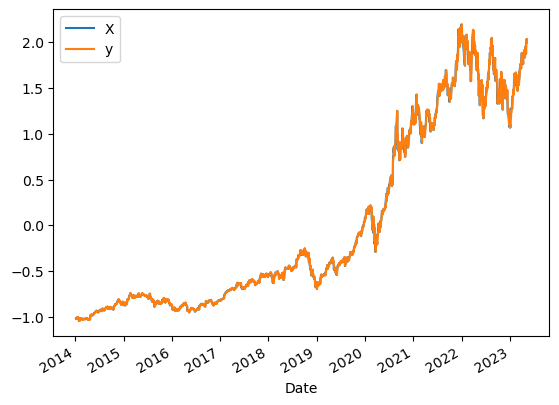

In [36]:
XY_DataframeL.plot()
plt.show()

In [37]:
XY_DataframeMA = pd.DataFrame()

In [38]:
XY_DataframeMA['X'] = X.MA3
XY_DataframeMA['y'] = y

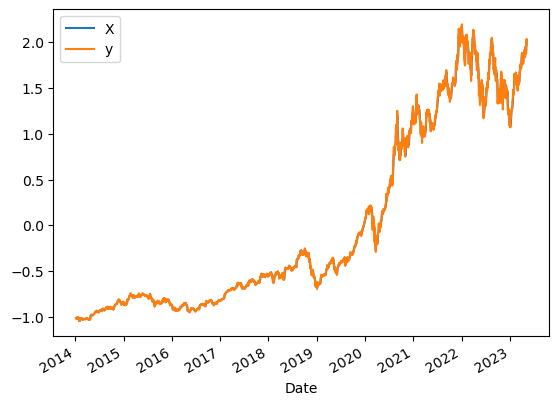

In [39]:
XY_DataframeMA.plot()
plt.show()

In [40]:
# 7. Segment your data into two parts, use 80% for 
# the training segment and 20% for the test, 
# show them with different chart colors

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [42]:
len(X_train)

1882

In [43]:
len(X_test)

471

In [44]:
len(y_train)

1882

In [45]:
len(y_test)

471

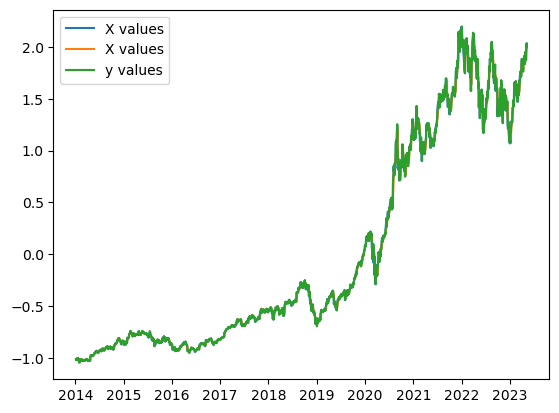

In [46]:
plt.plot(X, label='X values')
plt.plot(y, label='y values')
plt.legend()
plt.show()

In [47]:
X_train.shape

(1882, 2)

In [48]:
y_train.shape

(1882,)

In [49]:
X_test.shape

(471, 2)

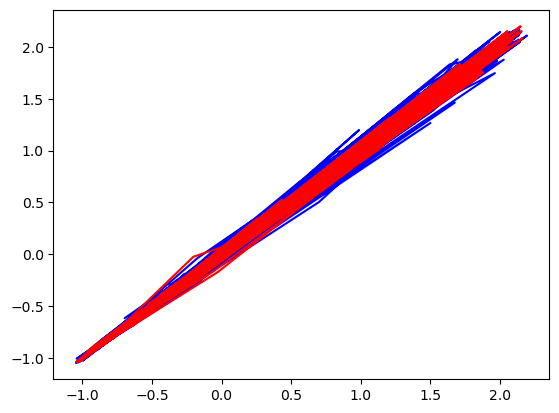

In [50]:
# # Plot training data in blue and test data in red
plt.plot(X_train, y_train, color='blue')
plt.plot(X_test, y_test, color='red')
plt.show()

In [51]:
# Created a regression model uisng sklearn Library

In [52]:
from sklearn.linear_model import LinearRegression

l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

LinearRegression()

In [53]:
# checking model score on training data

l_reg.score(X_train, y_train)

0.9995899701737447

In [54]:
# checking model score on test data

l_reg.score(X_test, y_test)

0.9995484242147107

In [55]:
# making predictions and saving into prediction variable

lr_predictions = l_reg.predict(X_test)

print('Actual:', X_test[:3])
print('Predicted:', lr_predictions[:3])

Actual:                Label       MA3
Date                          
2017-12-22 -0.556431 -0.533856
2019-10-08 -0.277844 -0.280006
2016-12-23 -0.819475 -0.821311
Predicted: [-0.54112828 -0.27918535 -0.82041025]


In [56]:
# plotting predicted value as per real

In [57]:
data_predicted = pd.DataFrame(data=lr_predictions, columns=['Predictions'])

In [58]:
data_predicted['Actual'] = y_test.to_list()

<function matplotlib.pyplot.show(close=None, block=None)>

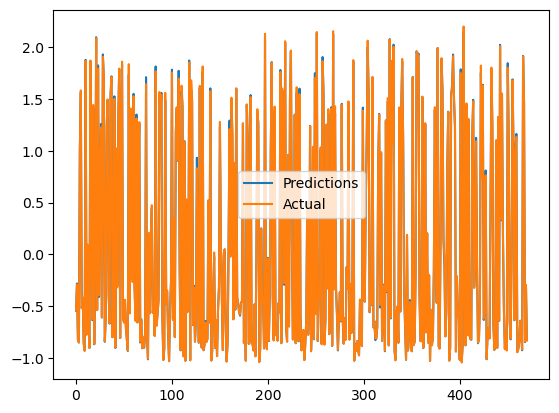

In [59]:
data_predicted.plot()
plt.show

In [60]:
# Implementing a MLP REGressor

In [61]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter = 500).fit(X_train, y_train) 
print(regr.score(X_train, y_train))

0.9985819741322992


In [62]:
MLPpredictions = regr.predict(X_test)

print(regr.score(X_test, y_test))

0.9986212235107218


In [63]:
print('Actual:', X_test[:3])
print('Predicted:', MLPpredictions[:3])

Actual:                Label       MA3
Date                          
2017-12-22 -0.556431 -0.533856
2019-10-08 -0.277844 -0.280006
2016-12-23 -0.819475 -0.821311
Predicted: [-0.56676841 -0.28984518 -0.82079303]


In [101]:
data_predicted['MLP_Predictions'] = MLPpredictions.tolist()

In [102]:
# plotting predicted values from both model and comparing

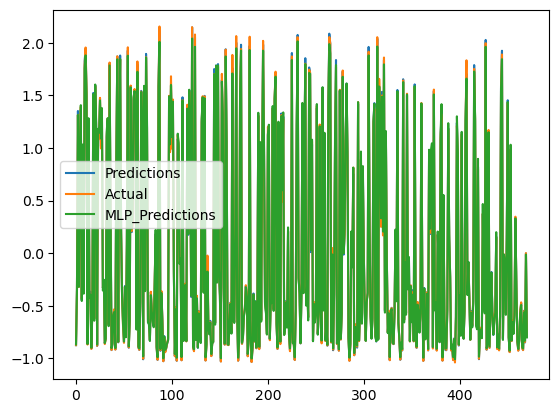

In [103]:
data_predicted.plot()
plt.show()

In [104]:
# Using MSE to check out the model performace, the minimum the MSE the more accuracy is better

In [64]:
from sklearn.metrics import mean_squared_error

lr_mse = mean_squared_error(y_test, lr_predictions)
# Print the mean squared error
print(f"Mean Squared Error: {lr_mse}")

Mean Squared Error: 0.0004774231603129849


In [65]:
MLP_mse = mean_squared_error(y_test, MLPpredictions)
# Print the mean squared error
print(f"Mean Squared Error: {MLP_mse}")

Mean Squared Error: 0.0014576951429198137


In [66]:
#CAlculating MSE with baseline model
import pandas as pd
from sklearn.metrics import mean_squared_error


# Split the data into training and testing sets
train_data = data[data.index < '2019-01-01']
test_data = data[data.index >= '2019-01-01']

# Calculate the mean of the sold_numbers column in the training set
mean_Close_numbers = train_data['Close'].mean()

# Create a list of predictions that is the same length as the testing set
baseline_predictions = [mean_Close_numbers] * len(test_data)

# Calculate the MSE of the baseline model on the testing set
mse_baseline = mean_squared_error(test_data['Close'], baseline_predictions)

print('MSE of baseline model:', mse_baseline)


MSE of baseline model: 3.30923321450271


In [67]:
# Comparison between baseline and regression model MSE
print(f"LR Mean Squared Error: {lr_mse}")
print('MSE of baseline model:', mse_baseline)


LR Mean Squared Error: 0.0004774231603129849
MSE of baseline model: 3.30923321450271


In [68]:
# Comparison between baseline and MLP-regression model
print(f"MLP Mean Squared Error: {MLP_mse}")
print('MSE of baseline model:', mse_baseline)


MLP Mean Squared Error: 0.0014576951429198137
MSE of baseline model: 3.30923321450271


In [69]:
from sklearn.ensemble import RandomForestRegressor

# Created a random forest regressor model and fit it to the training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [112]:
rf.score(X_test, y_test)

0.9992849741793169

In [113]:
from sklearn.metrics import mean_squared_error

# Make predictions on the testing data
rf_pred = rf.predict(X_test)

# Calculate the mean squared error of the predictions
mse_rf = mean_squared_error(y_test, rf_pred)

# Print the mean squared error
print(f"Mean Squared Error: {mse_rf}")

Mean Squared Error: 0.0006921726752001509


In [114]:
print(f"RF Mean Squared Error: {mse_rf}")
print('MSE of baseline model:', mse_baseline)


RF Mean Squared Error: 0.0006921726752001509
MSE of baseline model: 3.3099483604183675
